In [1]:
import os
import sys
import re
import time
import math
from datetime import timedelta
from datetime import timezone
from datetime import datetime
import json

# Third Party
import pandas as pd
import numpy as np
import requests

# PLOT
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_theme()

In [2]:
n_round = 56

from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())
PUBLIC_KEY = os.getenv("REMOTE_TEST_PUBLIC_KEY1")

curl -X POST "https://df-sql.oceandao.org/challenge/data" \
-H "Content-Type: application/json" \
-d '{"query": {"round": 51}}'

In [3]:
#response = requests.get(f"https://df-sql.oceandao.org/challenge/data/?round={n_round}")



payload = {"query": {"round": n_round}}
headers = {"Content-Type": "application/json; charset=utf-8"}
response =  requests.post('https://df-sql.oceandao.org/challenge/data',  data=json.dumps(payload), headers=headers)

In [4]:
json.dumps(payload)

'{"query": {"round": 56}}'

In [5]:
response

<Response [200]>

In [6]:
response.json()

[{'from_addr': '0x0006f31311c4aa4652c31692d11812c993fda0b2',
  'nft_addr': '0x8ea11d3b934f7641115e72cf8203d0a7a60a72d6',
  'nmse': 0.8675000072,
  'round': 56},
 {'from_addr': '0x0009ef12a01ce077b62b7242f998b8dbdb08e866',
  'nft_addr': '0x6d0734fd9f2bfb7610907ed61150b5d0923c78de',
  'nmse': 0.8755999804,
  'round': 56},
 {'from_addr': '0x0020a95bc0c3f056d0421b1126fb3c2831574d54',
  'nft_addr': '0x91111e7154773446995f5bd40a8445f8f6c2e2c9',
  'nmse': 0.7991999984,
  'round': 56},
 {'from_addr': '0x0026f79cadcaca0ce94c52881b1b75dc4951ba91',
  'nft_addr': '0xdc8c50f9280e5bafa41f9ba2c4472a3adf6c9cd8',
  'nmse': 2.2090001106,
  'round': 56},
 {'from_addr': '0x002991576a7f917b0a9e3f4cb87b88cd02bacbc5',
  'nft_addr': '0xfaee286fd6b8d375c33435b833a56520f9f87bf7',
  'nmse': 0.9577999711,
  'round': 56},
 {'from_addr': '0x005397355372adfeb0d7e7ada1cb120154349cf5',
  'nft_addr': '0x10b1bdb1ba8ce8591a8fac0e919e0c403e2803eb',
  'nmse': 0.9258999825,
  'round': 56},
 {'from_addr': '0x00723015a9f5c1db

In [7]:
list_dict = response.json()
df = pd.DataFrame.from_dict(list_dict)
df

,from_addr,nft_addr,nmse,round
0,0x0006f31311c4aa4652c31692d11812c993fda0b2,0x8ea11d3b934f7641115e72cf8203d0a7a60a72d6,0.8675,56
1,0x0009ef12a01ce077b62b7242f998b8dbdb08e866,0x6d0734fd9f2bfb7610907ed61150b5d0923c78de,0.8756,56
2,0x0020a95bc0c3f056d0421b1126fb3c2831574d54,0x91111e7154773446995f5bd40a8445f8f6c2e2c9,0.7992,56
3,0x0026f79cadcaca0ce94c52881b1b75dc4951ba91,0xdc8c50f9280e5bafa41f9ba2c4472a3adf6c9cd8,2.2090,56
4,0x002991576a7f917b0a9e3f4cb87b88cd02bacbc5,0xfaee286fd6b8d375c33435b833a56520f9f87bf7,0.9578,56
...,...,...,...,...
2281,0xff68389511a682c509b878e216e0d2f46eed4c79,0xe019575a8eea786e44eb5dde03c7d6079ce38c56,1.0010,56
2282,0xff764dc416f16f1fa9b1ce788cff40955b2199b6,0xdfc6dd513f2283ad10aa444af969cd162d0586c8,2.6720,56
2283,0xff9c6098e63002b4820f61a54d5db0407758f825,0x8900f400e40c1d44f50eac241fa377f273867b3a,0.1521,56
2284,0xffea903d570f601e20ded7859b1b09ff26ea66e2,0x3a94d215ef39c24b24911151726e69d9aaae692f,1.1340,56


In [8]:
df = df[df["nmse"]!=1]
df.sort_values(by="nmse", ignore_index=True, inplace=True)
df

/var/folders/m4/ng3wlwj109df2b8j9f4y4m7m0000gn/T/ipykernel_33588/3112475477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by="nmse", ignore_index=True, inplace=True)


,from_addr,nft_addr,nmse,round
0,0x4348f8ae986e3129ebafd7be83ded00af4e948ee,0xa0fb8ffd92dff591fa9eb99e52048fb75e558dd5,0.083290,56
1,0x4f367dce4162a2b867b774837d34f1cbb67b8ebb,0x96f45eda6b3b14f5c9a7fd66893183125207d938,0.116800,56
2,0x3287ffc7964b7de2ddbd7e03b18dd405a557f4c7,0xd0859291408c08b4e6af4f6edb1aa718c4c11321,0.143600,56
3,0x783dbecb858652a92f9c8f4afbb436e870864aa6,0xe911bdc18177139942c1111aaf72229b73c3b9ac,0.150700,56
4,0xff9c6098e63002b4820f61a54d5db0407758f825,0x8900f400e40c1d44f50eac241fa377f273867b3a,0.152100,56
...,...,...,...,...
2014,0xe75425d6d21010b34915c07fad52bc21bac27910,0x4148670488e715eb92ea7bb53af25205e1f92ea5,114.400002,56
2015,0x15d31b1a2311337f36685f524a212afd473537d3,0x8b6f023f6a25df1fecb9dd46da80e9a00d870b0c,192.800003,56
2016,0xb77c3a2842b173aba5a3da5c08ce26b79c8f50ee,0x46cf79ef4017479d8fbd7cde37f1403b45636d3b,207.800003,56
2017,0x60691b198fa963675b7f1a8678ed4c4371d9d0a2,0x7bdaa4f022c6ca765ef3396495072c975edc5217,209.899994,56


In [9]:
df[df["from_addr"].str.lower() == PUBLIC_KEY.lower()]["nmse"]

1030    1.144
Name: nmse, dtype: float64

In [10]:
df["from_addr"].nunique()

2019

In [11]:
df[(df["nmse"] < 0.99)] 

,from_addr,nft_addr,nmse,round
0,0x4348f8ae986e3129ebafd7be83ded00af4e948ee,0xa0fb8ffd92dff591fa9eb99e52048fb75e558dd5,0.08329,56
1,0x4f367dce4162a2b867b774837d34f1cbb67b8ebb,0x96f45eda6b3b14f5c9a7fd66893183125207d938,0.11680,56
2,0x3287ffc7964b7de2ddbd7e03b18dd405a557f4c7,0xd0859291408c08b4e6af4f6edb1aa718c4c11321,0.14360,56
3,0x783dbecb858652a92f9c8f4afbb436e870864aa6,0xe911bdc18177139942c1111aaf72229b73c3b9ac,0.15070,56
4,0xff9c6098e63002b4820f61a54d5db0407758f825,0x8900f400e40c1d44f50eac241fa377f273867b3a,0.15210,56
...,...,...,...,...
683,0xd0b3c95e9d33ce0ced86b61c0358a28d9706e614,0xd1dad887a66ff2c5bfda830be5a68fa71dcbdc84,0.98870,56
684,0x856c96dadc84d19cdc37341203724dcd255612fc,0xf5bfb68032092407ff02ce2ad98e98ec9598f20c,0.98930,56
685,0x46eebca1367d2d66e2cb3159c23c076cfb235aab,0x659d155de8cb9b7c0750b2c06c98d3fd24b9c621,0.98930,56
686,0x93f309ac157a75c8dffe7ec1112d5d29ff3b4001,0x53eafa3439b0eb4b24ae9a9783a40427d21405a7,0.98960,56


In [12]:
df[(df["nmse"] > 1) & (df["nmse"] < 1.529)]["from_addr"].nunique()

579

In [13]:
df[(df["nmse"] < 1)]["from_addr"].nunique()

710

(0.0, 10.0)

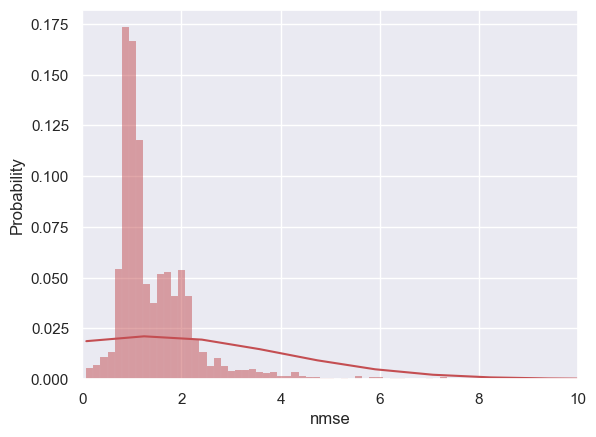

In [14]:
sns.histplot(
    data=df,
    x="nmse",  
    stat="probability", 
    kde=True, 
    color="r",
    label="TEST")
fig = plt.gcf()
ax = fig.gca()
ax.set_xlim([0,10])

In [15]:
df[(df["nmse"] == 1)]["from_addr"].nunique()

0

In [16]:
df[(df["nmse"] == 1)]["from_addr"].nunique() / df.shape[0]

0.0

In [17]:
df[(df["nmse"] == 1)].shape[0]

0

In [18]:
df.shape

(2019, 4)